# A brief tour through Gradient-Boosting Strategies

Do you remember the basic idea behind gradient-boosting (Topic 4)?

In [ ]:
#@title Setting up
!git clone https://github.com/mciprian/ml_class_content.git
!mv ml_class_content/notebooks/img img
!mv ml_class_content/notebooks/data data
!rm data/creditcard.zip
!rm -fr ml_class_content/

Cloning into 'ml_class_content'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 58 (delta 12), reused 46 (delta 9), pack-reused 9
Receiving objects: 100% (58/58), 84.76 MiB | 29.27 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [ ]:
#@title Setting the dataset

from sklearn.model_selection import train_test_split
from IPython.display import YouTubeVideo
import pandas as pd

df_purchase = pd.read_csv("data/training_sample.csv", delimiter=",", quotechar='"')
df_purchase_base, df_purchase_test = train_test_split(df_purchase, test_size=0.1,random_state=123)
df_purchase_train, df_purchase_validation = train_test_split(df_purchase_base, test_size=0.2)



In [ ]:
train_features = df_purchase_train.drop(['UserID','ordered'],axis=1)
val_features = df_purchase_validation.drop(['UserID','ordered'],axis=1)
test_features = df_purchase_test.drop(['UserID','ordered'],axis=1)

## The Gradient-Boosting Algorithm template


1.   Start with a default model $B(X)$ (ie. mean).
2.   Use the model to get the predicted values in train data.
3.   Calculate the residuals (predicted vs expected loss).
4.   Train a model to estimate the residuals $F_1(X)$
5.   Calculate new predictions using $B(X) + \lambda F_1(X)$
6.   Go to step 3 and generate a new model.
7.   Until the residuals are 0 or (and most likely) you reach the maximum amount of models.

Normally, the $F$ models are built using tree-based models, that's because are simple, efficient and effective.

In classification problems we need consider:

*   The residuals are in term of $$log(odds) = {log({p \over 1-p})}$$
*   Before add the models results, you need to apply a transformation: $$ \sum{Residual_i} \over \sum{Previous Probability_i \times (1 - Previous Probability_i) } $$
*   To get a prediction it is necessary to transform the result to probabilities $$ e^{log(odds)} \over 1 + e^{log(odds)} $$

[StackQuest](https://www.youtube.com/watch?v=3CC4N4z3GJc) has a nice series of videos about this

In [ ]:
#@title Gradient boost in Sklearn

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import f1_score

In [ ]:
clf = HistGradientBoostingClassifier().fit(train_features, df_purchase_train['ordered'])

In [ ]:
f1_score(df_purchase_validation['ordered'], clf.predict(val_features))

0.925468424705066

### Assigment

Check the [HistGradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html#sklearn.ensemble.HistGradientBoostingClassifier) docs and answer the following questions:


*   Which is the default value of $\lambda$?
*   How you fix the number of models (trees) to build?
*   How you define the trees size (depth)?
*   What happen with the model perfomance if you use other values of $\lambda$ and number of models?




# XGBoost

Use the same Boosting aproach idea, but it uses another approach to build the trees from residuals.
*   The splits are created based on residuals similarity.
*   A Regularization factor can be applied.
*   The trees are pruned based on $\gamma$ parameter.
*   Take advance of parallelism and GPUs


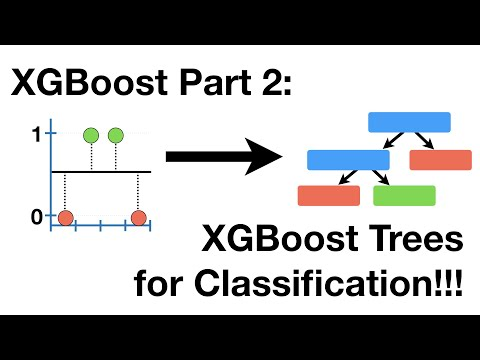

In [ ]:
YouTubeVideo('8b1JEDvenQU',width=640, height=480)

In [ ]:
#@title The XBGBoost Library
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(objective='binary:logistic').fit(train_features, df_purchase_train['ordered'])

In [ ]:
f1_score(df_purchase_validation['ordered'], xgb_model.predict(val_features))

0.9229095853161116

Check the [XGBClassifier](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) docs and answer the following questions:

*    Which option is better in this scenario. Few deep trees or lots or shallow trees?
*   Could you find a set of hyperparameters that improves the default settings?

## Catboost

This strategy relies in a different way to treat categorical variables (Catboost comes from categorical boosting), called ordered target enconding. Also, the model is trained following a ordered approach

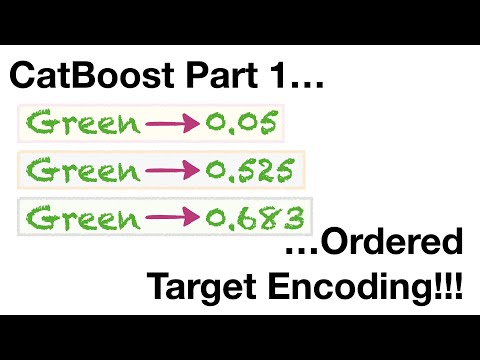

In [ ]:
YouTubeVideo('KXOTSkPL2X4',width=640, height=480)

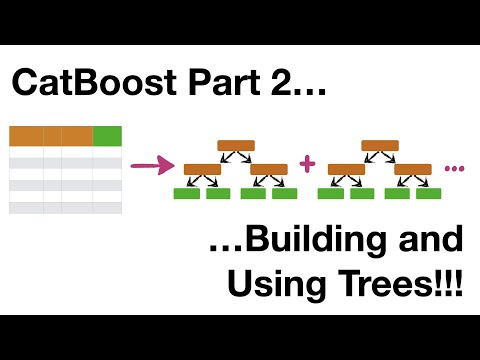

In [ ]:
YouTubeVideo('3Bg2XRFOTzg',width=640, height=480)

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 2.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cat_model = CatBoostClassifier(logging_level='Silent').fit(train_features, df_purchase_train['ordered'],plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
f1_score(df_purchase_validation['ordered'], cat_model.predict(val_features))

0.9210024516480524

### Assigment

Check the [CatBoostClassifier](https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier) docs and this [example](https://github.com/catboost/tutorials/blob/master/python_tutorial.ipynb) and answer these questions:

*   How we can take advance of categorical variables during train.
*   Could you test other hyperameters (learning rate, iterations, etc) a see the impact in model's performance?
*  What information you can extract from the following code blocks




In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, '????')

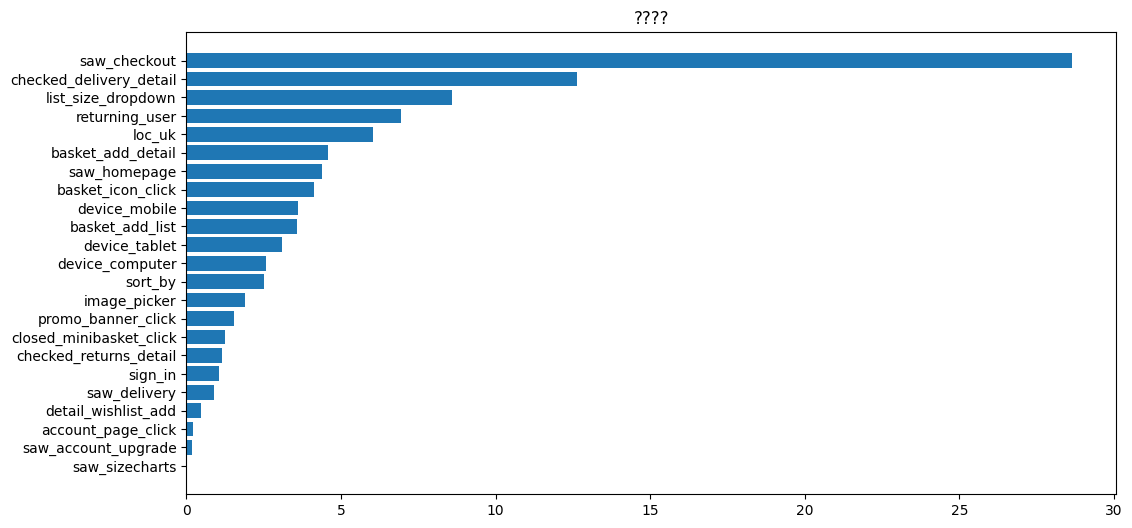

In [ ]:

feature_importance = cat_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(val_features.columns)[sorted_idx])
plt.title('????')
